## **STATISTICAL ANALYSIS OF POPULATION OF AFRICAN WOMEN WITH CANCER** 
This research aimed to provide further insight into the dynamics of cancer prevalence among African women especially between 2016 and 2020. In order to meet the project’s objectives, the respective data were cleaned to remove extraneous features and then merged into a single file for ease of computation and presentation. Working with Python programming language we were able to compute the Mortality-to-Incidence Ratio (MIR) as well as the 5-year Relative Survival (RS) rate for the different age groups in each country. Ten cancer-causing factors were selected and a hypothesis was tested to see if indeed there was any relationship between cancer incidence and these variables.


We begin by importing relevant libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import anderson

import sys
!{sys.executable} -m pip install xlwt
import xlwt
from xlwt.Workbook import *
from pandas import ExcelWriter
import xlsxwriter

For better visualization outputs, we employ the following settings

In [14]:
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

We proceed to import our data from the different sources

df1 = Cancer Causing Factors

df2 = African Women Cancer Mortality 

df3 = African Women Cancer Incidence

In [15]:
df1 = pd.read_excel(r'C:\Users\chibuikn\OneDrive - NTNU\RESEARCH\African Women Cancer\Cancer-Atlas-3rd-ed_Map-data-download.xlsx', na_values = 'No data')

In [16]:
df2 = pd.read_excel(r'C:\Users\chibuikn\OneDrive - NTNU\RESEARCH\African Women Cancer\African Women Cancer Mortality 2020.xlsx', na_values = '-')
df3 = pd.read_excel(r'C:\Users\chibuikn\OneDrive - NTNU\RESEARCH\African Women Cancer\African Women Cancer Incidence 2020.xlsx', na_values = '-')

### Working with the Cancer Causing Factors Data
Cleaning df1

In [17]:
df1.head(2)

,Downloaded from: www.canceratlas.cancer.org. Please refer to source information below table.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,Country or Territory,ISO 3 code,Cancer deaths attributable to alcohol\nProport...,Cancer deaths attributable to alcohol\nProport...,Smoking prevalence male\nPrevalence (%) of dai...,Smoking prevalence female\nPrevalence (%) of d...,Cancers attributable to infections\nProportion...,Obesity prevalence male\nInternational variati...,Obesity prevalence female\nInternational varia...,Melanoma skin cancer incidence\nAge-standardiz...,...,"Cervical cancer screening, HPV DNA testing\n2017",Radiotherapy availability\nNumber of radiother...,Untreated deaths in pain\n2016,Population-based cancer registries\nAvailabili...,Mortality registration quality\nQuality of mor...,Cost of smoking-attributable diseases (US$ bil...,Cervical cancer incidence rates\nAge-standardi...,"HIV prevalence (%)\nBoth sexes, 2017",UICC organizations\nA global network of cancer...,Global Relay For Life\n2017
1,Afghanistan,AFG,0.1,0.5,21.4,7,16,3.2,7.6,0.3,...,None,0,5785.1,PBCR,No coverage,Data not featured,6.6,NaN,2,Non-participant


Renaming the column labels

In [18]:
df1_dict = {'Downloaded from: www.canceratlas.cancer.org. Please refer to source information below table.': 'Country', 'Unnamed: 2': 'Alcohol', 'Unnamed: 5': 'Smoking', 'Unnamed: 8' : 'Obesity', 'Unnamed: 10': 'Breastfeeding', 'Unnamed: 12': 'Outdoor Air Pollution', 'Unnamed: 13': 'Indoor Air Pollution', 'Unnamed: 26': 'Survivors', 'Unnamed: 31': 'Hepatitis B Vaccination'}

In [19]:
df1 = df1.rename(columns = df1_dict)
df1.head(2)

,Country,Unnamed: 1,Alcohol,Unnamed: 3,Unnamed: 4,Smoking,Unnamed: 6,Unnamed: 7,Obesity,Unnamed: 9,...,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,Country or Territory,ISO 3 code,Cancer deaths attributable to alcohol\nProport...,Cancer deaths attributable to alcohol\nProport...,Smoking prevalence male\nPrevalence (%) of dai...,Smoking prevalence female\nPrevalence (%) of d...,Cancers attributable to infections\nProportion...,Obesity prevalence male\nInternational variati...,Obesity prevalence female\nInternational varia...,Melanoma skin cancer incidence\nAge-standardiz...,...,"Cervical cancer screening, HPV DNA testing\n2017",Radiotherapy availability\nNumber of radiother...,Untreated deaths in pain\n2016,Population-based cancer registries\nAvailabili...,Mortality registration quality\nQuality of mor...,Cost of smoking-attributable diseases (US$ bil...,Cervical cancer incidence rates\nAge-standardi...,"HIV prevalence (%)\nBoth sexes, 2017",UICC organizations\nA global network of cancer...,Global Relay For Life\n2017
1,Afghanistan,AFG,0.1,0.5,21.4,7,16,3.2,7.6,0.3,...,None,0,5785.1,PBCR,No coverage,Data not featured,6.6,NaN,2,Non-participant


Viewing column names for easy dropping off of irrelevant features

In [20]:
to_drop = ['Unnamed: 1', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Hepatitis B Vaccination', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42']

In [21]:
df1.drop(to_drop, inplace = True, axis = 1)

In [22]:
df1.head(2)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
0,Country or Territory,Cancer deaths attributable to alcohol\nProport...,Smoking prevalence female\nPrevalence (%) of d...,Obesity prevalence female\nInternational varia...,Breastfeeding at 12 months\nPercent (%) of chi...,Outdoor air pollution\nAverage annual populati...,Indoor air pollution\nProportion (%) of popula...,Cancer survivors\nEstimated number of cancer s...
1,Afghanistan,0.1,7,7.6,88,57,71,151


Dropping the first row since it is only a repition of the column labels

In [23]:
df1.drop(0, axis = 0, inplace = True)

In [24]:
df1.head(5)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,Afghanistan,0.1,7,7.6,88,57,71,151
2,Albania,2.4,6.1,21.8,72.3,18,35,401.1
3,Algeria,0.2,2.2,34.9,55.1,39,0.32,312.6
4,Andorra,NaN,19.8,25.3,NaN,10,0.63,NaN
5,Angola,2.4,1.6,12.1,92.6,32,56.0,190.2


Checking for the columns with missing values

In [25]:
df1_incomplete = df1[df1.isnull().any(axis = 1)].head(40)
df1_incomplete

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
4,Andorra,NaN,19.8,25.3,NaN,10,0.63,NaN
6,Antigua and Barbuda,2.4,2.2,25.9,NaN,19,1.8,NaN
12,Bahamas,1.8,3.7,38.1,NaN,17,2.9,462.5
15,Barbados,2.2,0.7,31.3,NaN,23,0.063,607.9
17,Belgium,4.2,16.4,21,NaN,13,0.35,1076
22,Bosnia and Herzegovina,2.7,22.6,18.4,NaN,28,40,479.2
25,Brunei Darussalam,0.8,1.8,15.7,NaN,5.9,0.2,572.2
26,Bulgaria,3.4,17.5,24.3,NaN,19,16,591.8
40,Cook Islands,NaN,16.4,59.2,NaN,NaN,NaN,NaN
43,Croatia,3,23.4,24.5,NaN,18,11,769.8


Dropping all bottom values which are not needed

In [26]:
df1 = df1.drop(210, axis = 0)
df1 = df1.drop(209, axis = 0)
df1.tail(2)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
207,Zambia,0.8,2.5,12.4,94.7,27,85,266.9
208,Zimbabwe,0.6,1.3,25.3,89,22,67,330.6


Replacing the missing variables with the median, not mean, since there are outliers in the dataset. Also, since dropping them all together might mean some African countries would not be represented in the results. We only did for Obesity and Breastfeeding since they are the variables of interest. France, La Reunion was dropped also because they had no data at all across the different variables.

In [27]:
median = df1["Breastfeeding"].median()
df1["Breastfeeding"] = df1["Breastfeeding"].fillna(median)

In [28]:
median = df1["Obesity"].median()
df1["Obesity"] = df1["Obesity"].fillna(median)

In [29]:
df1_incomplete = df1[df1.isnull().any(axis = 1)].tail(40)
df1_incomplete

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
4,Andorra,NaN,19.8,25.30,73.95,10,0.63,NaN
6,Antigua and Barbuda,2.4,2.2,25.90,73.95,19,1.8,NaN
40,Cook Islands,NaN,16.4,59.20,73.95,NaN,NaN,NaN
51,Dominica,NaN,1.2,35.60,73.95,19,8.4,NaN
64,French Guiana,NaN,NaN,22.75,73.95,NaN,NaN,703.6
65,French Polynesia,NaN,NaN,22.75,73.95,NaN,NaN,661.9
72,Greenland,NaN,NaN,22.75,73.95,12,0.64,NaN
73,Grenada,2.6,2.5,29.00,73.95,23,3.5,NaN
74,Guadeloupe,NaN,NaN,22.75,73.95,NaN,NaN,776.5
75,Guam,NaN,NaN,22.75,73.95,12,7.7,418


In [30]:
df1 = df1.dropna()
df1.head(50)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,Afghanistan,0.1,7,7.6,88.00,57,71,151
2,Albania,2.4,6.1,21.8,72.30,18,35,401.1
3,Algeria,0.2,2.2,34.9,55.10,39,0.32,312.6
5,Angola,2.4,1.6,12.1,92.60,32,56.0,190.2
7,Argentina,2.7,12.6,29.0,62.00,13,2.3,587.1
8,Armenia,1.8,1.5,23.0,52.30,33,16,402.2
9,Australia,3.7,13.3,28.4,30.00,8.6,0.3,1849.8
10,Austria,3.6,15.8,18.3,16.00,12,0.87,737.9
11,Azerbaijan,1,0.3,23.6,36.10,20,15,228.1
12,Bahamas,1.8,3.7,38.1,73.95,17,2.9,462.5


Confirming that no missing values are in the data

In [31]:
df1_incomplete = df1[df1.isnull().any(axis = 1)].head()
df1_incomplete

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors


Getting the general overview of our Cancer Causing Factors

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 208
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                176 non-null    object 
 1   Alcohol                176 non-null    object 
 2   Smoking                176 non-null    object 
 3   Obesity                176 non-null    float64
 4   Breastfeeding          176 non-null    float64
 5   Outdoor Air Pollution  176 non-null    object 
 6   Indoor Air Pollution   176 non-null    object 
 7   Survivors              176 non-null    object 
dtypes: float64(2), object(6)
memory usage: 12.4+ KB


In [33]:
df1.describe()

,Obesity,Breastfeeding
count,176.000000,176.000000
mean,21.530114,67.184659
std,10.130724,25.343803
min,2.600000,2.000000
25%,12.850000,49.500000
50%,21.800000,73.950000
75%,27.650000,88.025000
max,55.000000,99.400000


Observe that all our features are of object type.

Creating a new dataframe for only numerical features by dropping categorical features.

Converting the numeric features to floats

In [34]:
df1_num = df1.drop(columns = 'Country')
df1_num = pd.DataFrame(df1_num, dtype = 'float64')

In [35]:
df1_num.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 208
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Alcohol                176 non-null    float64
 1   Smoking                176 non-null    float64
 2   Obesity                176 non-null    float64
 3   Breastfeeding          176 non-null    float64
 4   Outdoor Air Pollution  176 non-null    float64
 5   Indoor Air Pollution   176 non-null    float64
 6   Survivors              176 non-null    float64
dtypes: float64(7)
memory usage: 11.0 KB


In [36]:
df1_num.head(2)

,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,0.1,7.0,7.6,88.0,57.0,71.0,151.0
2,2.4,6.1,21.8,72.3,18.0,35.0,401.1


Working with the categorical feature by selecting only the categorical feature from the initial dataframe, df1

In [37]:
df1_cat = df1['Country']
df1_cat = pd.DataFrame(df1_cat)

Merging the numerical and categorical features to form a new df1 dataframe

In [38]:
df1 = pd.merge(df1_cat, df1_num, right_index = True, left_index = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 1 to 208
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                176 non-null    object 
 1   Alcohol                176 non-null    float64
 2   Smoking                176 non-null    float64
 3   Obesity                176 non-null    float64
 4   Breastfeeding          176 non-null    float64
 5   Outdoor Air Pollution  176 non-null    float64
 6   Indoor Air Pollution   176 non-null    float64
 7   Survivors              176 non-null    float64
dtypes: float64(7), object(1)
memory usage: 16.4+ KB


Checking to see we are on track

In [39]:
df1.head(2)

,Country,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,Afghanistan,0.1,7.0,7.6,88.0,57.0,71.0,151.0
2,Albania,2.4,6.1,21.8,72.3,18.0,35.0,401.1


Cancer Causing Factors Data is ready for use.

### Working with the African  Women Cancer Mortality Data
Cleaning df2

In [40]:
df2.head(2)

,Population,Number,Uncertainty interval,Crude Rate,ASR (World),Cum. risk
0,Africa,387546,[316060.0-475200.0],57.8,89.2,18.55
1,Nigeria,44699,[41311.7-48364.0],44.0,79.5,16.63


Renaming Population to Country to match feature in df1.

Renaming Number to Mortality for easy indentification.

Dropping Uncertainty interval, Crude Rate, ASR and Cum. risk

In [41]:
df2_dict = {'Population': 'Country', 'Number': 'Mortality'}
df2 = df2.rename(columns = df2_dict)
df2.head(2)

,Country,Mortality,Uncertainty interval,Crude Rate,ASR (World),Cum. risk
0,Africa,387546,[316060.0-475200.0],57.8,89.2,18.55
1,Nigeria,44699,[41311.7-48364.0],44.0,79.5,16.63


In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               55 non-null     object 
 1   Mortality             55 non-null     int64  
 2   Uncertainty interval  55 non-null     object 
 3   Crude Rate            55 non-null     float64
 4   ASR (World)           55 non-null     float64
 5   Cum. risk             55 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 2.7+ KB


In [43]:
df2_c = df2['Country']
df2_c = pd.DataFrame(df2_c)
df2_c.head(2)

,Country
0,Africa
1,Nigeria


In [44]:
df2_m = df2['Mortality']
df2_m = pd.DataFrame(df2_m)
df2_m.head(2)

,Mortality
0,387546
1,44699


In [45]:
df2 = pd.merge(df2_c, df2_m, right_index = True, left_index = True)
df2.head(2)

,Country,Mortality
0,Africa,387546
1,Nigeria,44699


We don't need the first row, Total mortality in Africa so we drop it

In [46]:
df2 = df2.drop(0, axis = 0)
df2.head(2)

,Country,Mortality
1,Nigeria,44699
2,Egypt,40752


Sorting the data to match the df1 Country values

Resetting the index

In [47]:
df2 = df2.sort_values('Country')
df2 = df2.reset_index()
df2 = df2.drop(columns = 'index')
df2.head(2)

,Country,Mortality
0,Algeria,14900
1,Angola,6914


In [48]:
df2.shape

(54, 2)

African Women Cancer Mortality Data is ready to use

### Working with African Women Cancer Incidence Data
Cleaning df3

In [49]:
df3.head(2)

,Population,Number,Uncertainty interval,Crude Rate,ASR (World),Cum. risk
0,Africa,633456,[525277.0-763915.0],94.4,139.5,23.66
1,Nigeria,73417,[68351.2-78858.2],72.2,122.5,21.65


In [50]:
df3_dict = {'Population': 'Country', 'Number': 'Incidence'}
df3 = df3.rename(columns = df3_dict)
df3.head(2)

,Country,Incidence,Uncertainty interval,Crude Rate,ASR (World),Cum. risk
0,Africa,633456,[525277.0-763915.0],94.4,139.5,23.66
1,Nigeria,73417,[68351.2-78858.2],72.2,122.5,21.65


In [51]:
df3_c = df3['Country']
df3_c = pd.DataFrame(df3_c)
df3_c

,Country
0,Africa
1,Nigeria
2,Egypt
3,South Africa
4,Ethiopia
5,Algeria
6,Morocco
7,Congo
8,Kenya
9,Tanzania


In [52]:
df3_i = df3['Incidence']
df3_i = pd.DataFrame(df3_i)

In [53]:
df3 = pd.merge(df3_c, df3_i, right_index = True, left_index = True)
df3.head(2)

,Country,Incidence
0,Africa,633456
1,Nigeria,73417


In [54]:
df3 = df3.drop(0, axis = 0)
df3 = df3.sort_values('Country')
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index', axis = 1)
df3.head(2)

,Country,Incidence
0,Algeria,31090
1,Angola,11553


In [55]:
df3.shape

(54, 2)

In [56]:
df2.columns

Index(['Country', 'Mortality'], dtype='object')

In [57]:
ls = []
for coun in list(df3['Country']):
    for che in list(df2['Country']):
        if coun == che:
            ls.append(coun)
#list(df3['Country']) in list(df2['Country'])

len(ls)

54

African Women Cancer Incidence Data is ready to use

### Working with all three data in one final dataframe
Merging dataframes

In [58]:
df_23 = pd.merge(df2, df3, how = 'inner', on = 'Country')
df_23

,Country,Mortality,Incidence
0,Algeria,14900,31090
1,Angola,6914,11553
2,Benin,2397,3617
3,Botswana,618,1171
4,Burkina Faso,5447,7740
5,Burundi,3288,4641
6,Cabo Verde,226,420
7,Cameroon,7551,12235
8,Central African Republic,1158,1612
9,Chad,3545,5142


In [59]:
df_23.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Country    54 non-null     object
 1   Mortality  54 non-null     int64 
 2   Incidence  54 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


In [60]:
df_final = pd.merge(df_23, df1, how = 'inner', left_index = False, right_index = False)
df_final.tail(60)

,Country,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
0,Algeria,14900,31090,0.2,2.2,34.90,55.10,39.0,0.320,312.6
1,Angola,6914,11553,2.4,1.6,12.10,92.60,32.0,56.000,190.2
2,Benin,2397,3617,1.1,1.0,14.20,85.60,39.0,90.000,198.1
3,Botswana,618,1171,2.1,3.5,29.30,44.50,23.0,46.000,236.7
4,Burkina Faso,5447,7740,2.4,3.5,8.10,97.20,43.0,95.000,158.1
5,Burundi,3288,4641,1.9,0.9,8.60,96.40,39.0,99.000,194.8
6,Cabo Verde,226,420,2.5,2.6,16.30,83.10,35.0,39.000,254.2
7,Cameroon,7551,12235,2.3,0.5,16.40,85.50,73.0,65.000,180.5
8,Central African Republic,1158,1612,1.4,1.4,10.90,90.90,57.0,98.000,110.8
9,Chad,3545,5142,1.6,1.9,8.90,90.40,66.0,96.000,128.9


In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                53 non-null     object 
 1   Mortality              53 non-null     int64  
 2   Incidence              53 non-null     int64  
 3   Alcohol                53 non-null     float64
 4   Smoking                53 non-null     float64
 5   Obesity                53 non-null     float64
 6   Breastfeeding          53 non-null     float64
 7   Outdoor Air Pollution  53 non-null     float64
 8   Indoor Air Pollution   53 non-null     float64
 9   Survivors              53 non-null     float64
dtypes: float64(7), int64(2), object(1)
memory usage: 4.6+ KB


The final data is ready for use!

For the sake of clarity, we explain what the different variables are:

**Mortality** - An estimate of the sex-specific mortality rates of cancer in a specific country (https://gco.iarc.fr/today/data-sources-methods#cancer-dictionary) World Health Organization. (2018). Global Health Observatory. Geneva: World Health Organization; 2018. Available: who. int/gho/database/en/.[Accessed 10 July 2019].

**Incidence** - An estimate of the sex-specific incidence rates of cancer in a specific country (https://gco.iarc.fr/today/data-sources-methods#cancer-dictionary)

**Alcohol** - Proportion (%) of cancer deaths caused by alcohol drinking in women ages 15 years or older, 2016 (https://canceratlas.cancer.org/data/map/)

**Smoking** - Prevalence (%) of daily smoking for women (https://canceratlas.cancer.org/data/map/)

**Obesity** - International variation in the prevalence of obesity (%), 2016 (https://canceratlas.cancer.org/data/map/)

**Breastfeeding** - Percent (%) of children who receive any breast milk at 12 months of age (https://canceratlas.cancer.org/data/map/)

**Outdoor Air Pollution** - Average annual population-weighted concentrations of PM2.5 (particulate matter of 2.5 μm diameter or less), measured in μg/m3, 2017 (https://canceratlas.cancer.org/data/map/)

**Indoor Air Pollution** - Proportion (%) of population using solid fuels in 2017 (https://canceratlas.cancer.org/data/map/)

**Survivors** - Estimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, 2018 i.e **Five-year Survival Rate** (https://canceratlas.cancer.org/data/map/)

Having merged all three data sets, we proceed to do some exploratory data analysis on the final data

In [62]:
df_final.describe()

,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,7296.396226,11919.264151,1.416981,1.877358,16.984906,84.877358,38.867925,68.669302,205.254717
std,9952.998507,16828.969932,1.043614,1.674083,9.012089,14.171320,16.937711,33.337220,70.739834
min,48.000000,70.000000,0.000000,0.100000,6.900000,44.500000,14.000000,0.083000,74.800000
25%,1031.000000,1612.000000,0.600000,0.800000,11.100000,79.400000,26.000000,54.000000,155.700000
50%,3698.000000,5152.000000,1.400000,1.400000,13.500000,90.400000,36.000000,80.000000,192.200000
75%,8026.000000,12447.000000,2.300000,2.500000,20.300000,95.600000,46.000000,96.000000,247.700000
max,44699.000000,73417.000000,5.100000,7.900000,41.100000,99.400000,94.000000,99.000000,436.200000


Visualizing the Top 5 countries for the respective variables

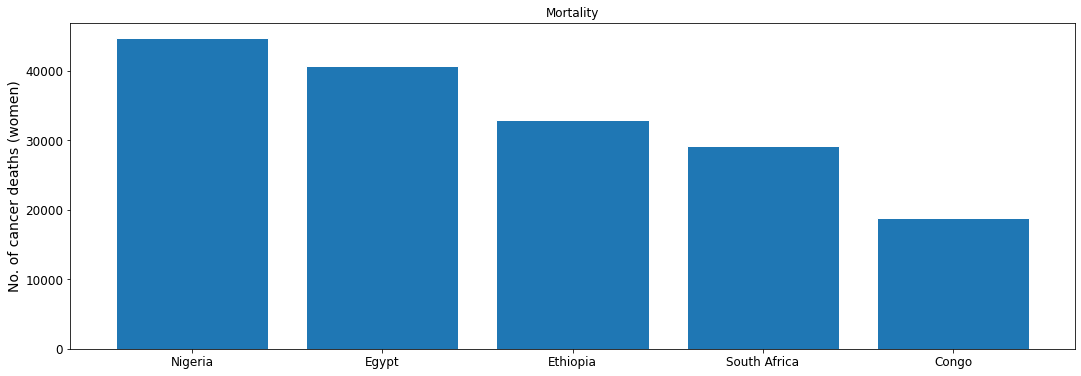

In [63]:
top_1 = df_final.nlargest(5, list(df_final.columns)[1])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18, 6)
ax.bar(top_1[list(df_final.columns)[0]],top_1[list(df_final.columns)[1]], edgecolor="white")
ax.set_title(list(df_final.columns)[1])
ax.set_ylabel('No. of cancer deaths (women)')
plt.show()

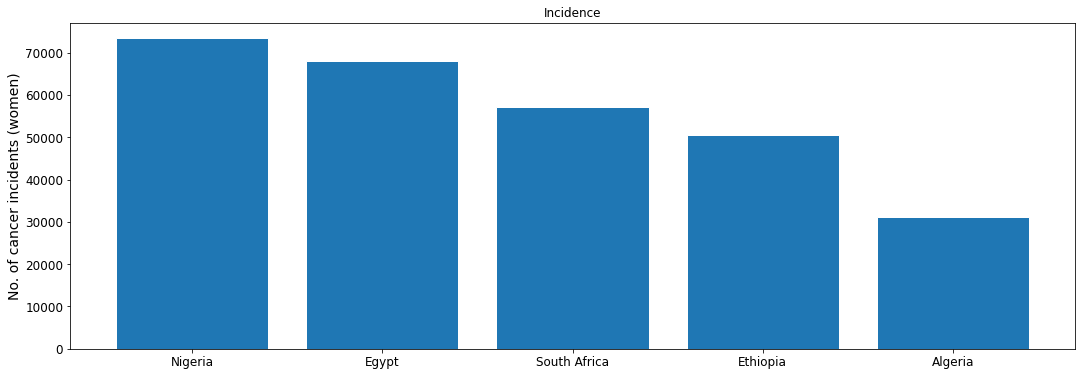

In [64]:
top_2 = df_final.nlargest(5, list(df_final.columns)[2])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18, 6)
ax.bar(top_2[list(df_final.columns)[0]],top_2[list(df_final.columns)[2]], edgecolor="white")
ax.set_title(list(df_final.columns)[2])
ax.set_ylabel('No. of cancer incidents (women)')
plt.show()

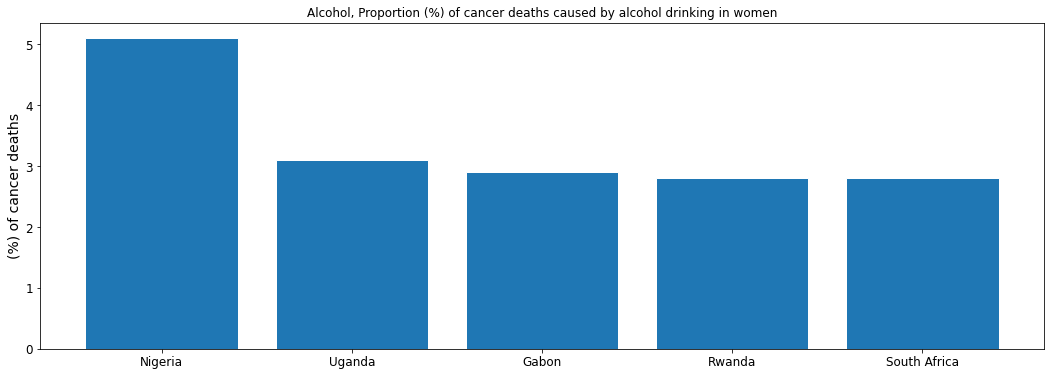

In [65]:
top_3 = df_final.nlargest(5, list(df_final.columns)[3])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18, 6)
ax.bar(top_3[list(df_final.columns)[0]],top_3[list(df_final.columns)[3]], edgecolor="white")
ax.set_title(f'{list(df_final.columns)[3]}, Proportion (%) of cancer deaths caused by alcohol drinking in women')
ax.set_ylabel('(%) of cancer deaths')
plt.show()

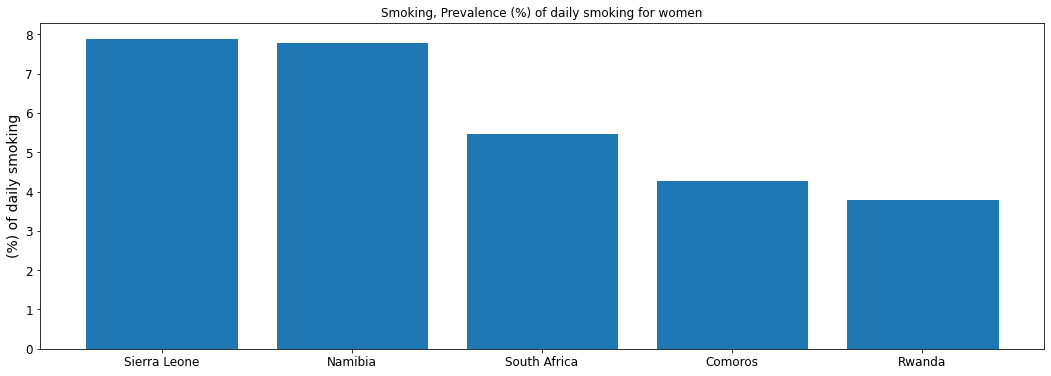

In [66]:
top_4 = df_final.nlargest(5, list(df_final.columns)[4])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18, 6)
ax.bar(top_4[list(df_final.columns)[0]],top_4[list(df_final.columns)[4]], edgecolor="white")
ax.set_title(f'{list(df_final.columns)[4]}, Prevalence (%) of daily smoking for women')
ax.set_ylabel('(%) of daily smoking')
plt.show()

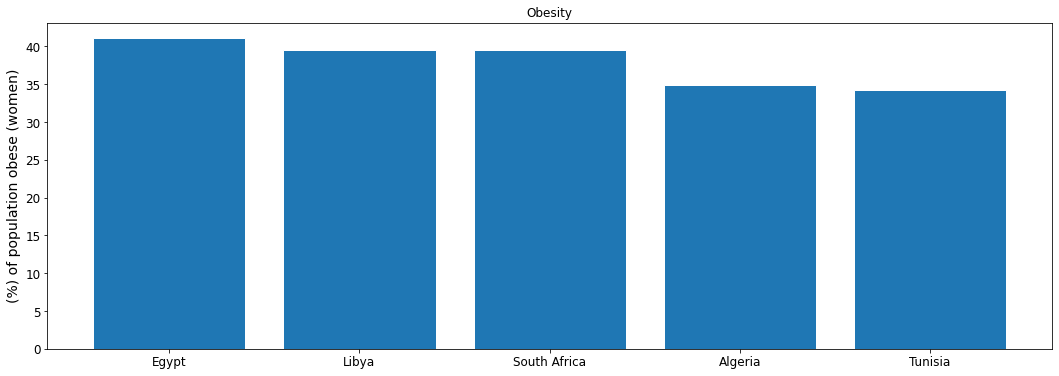

In [67]:
top_5 = df_final.nlargest(5, list(df_final.columns)[5])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18, 6)
ax.bar(top_5[list(df_final.columns)[0]],top_5[list(df_final.columns)[5]], edgecolor="white")
ax.set_title(list(df_final.columns)[5])
ax.set_ylabel('(%) of population obese (women)')
plt.show()

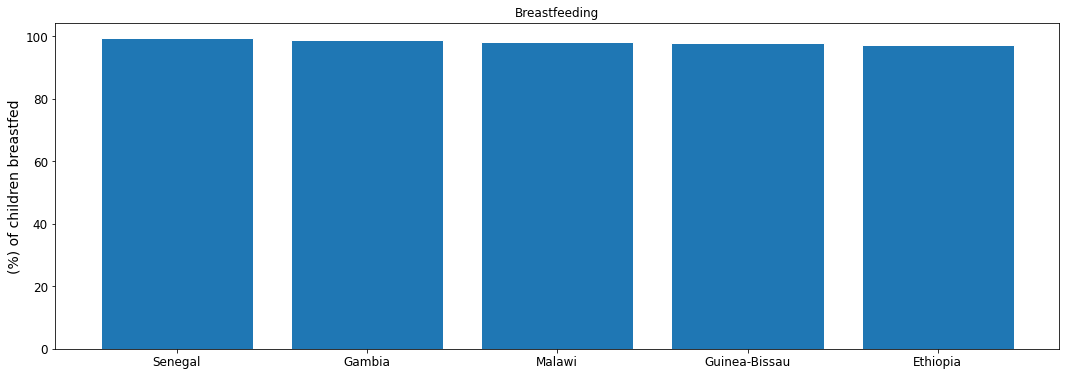

In [68]:
top_6 = df_final.nlargest(5, list(df_final.columns)[6])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18, 6)
ax.bar(top_6[list(df_final.columns)[0]],top_6[list(df_final.columns)[6]], edgecolor="white")
ax.set_title(list(df_final.columns)[6])
ax.set_ylabel('(%) of children breastfed')
plt.show()

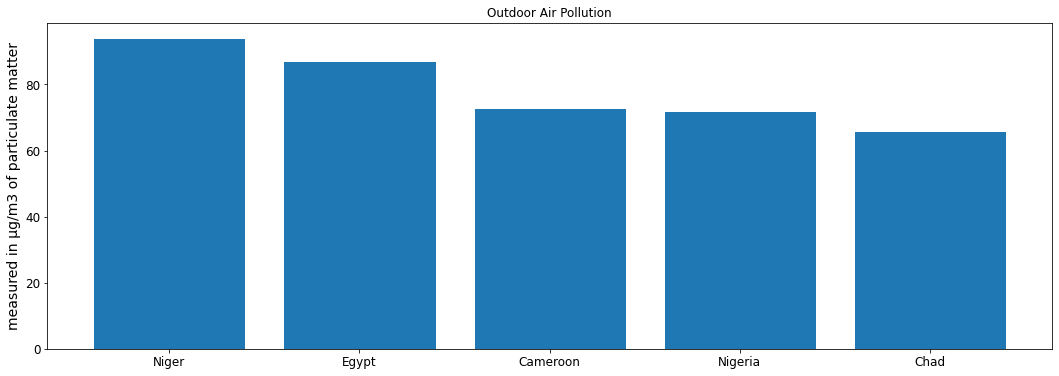

In [69]:
top_7 = df_final.nlargest(5, list(df_final.columns)[7])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18, 6)
ax.bar(top_7[list(df_final.columns)[0]],top_7[list(df_final.columns)[7]], edgecolor="white")
ax.set_title(list(df_final.columns)[7])
ax.set_ylabel('measured in μg/m3 of particulate matter')
plt.show()

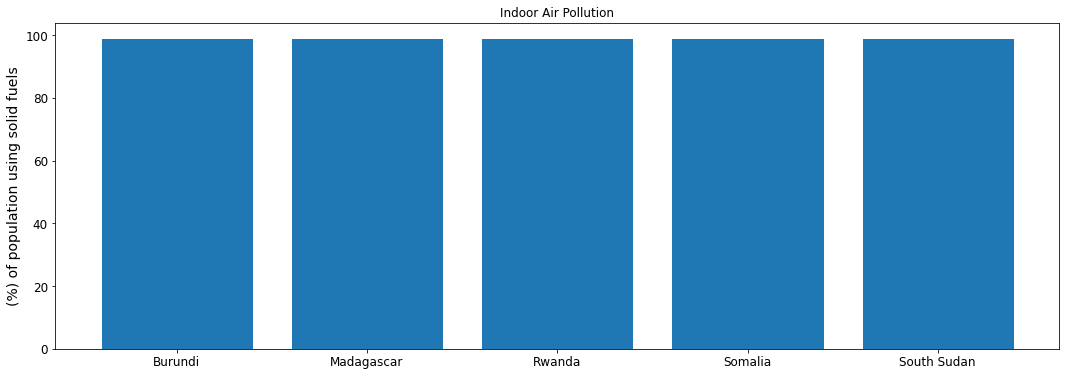

In [70]:
top_8 = df_final.nlargest(5, list(df_final.columns)[8])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18, 6)
ax.bar(top_8[list(df_final.columns)[0]],top_8[list(df_final.columns)[8]], edgecolor="white")
ax.set_title(list(df_final.columns)[8])
ax.set_ylabel('(%) of population using solid fuels')
plt.show()

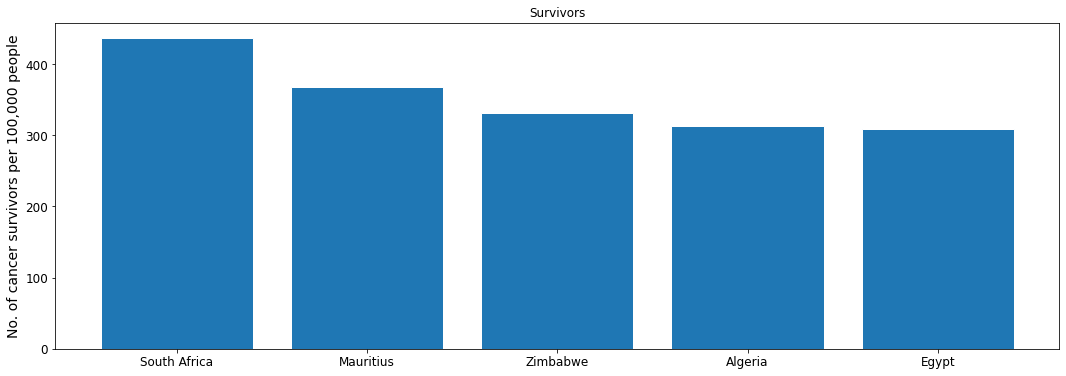

In [71]:
top_9 = df_final.nlargest(5, list(df_final.columns)[9])

fig, ax = plt.subplots()
fig = plt.gcf()
fig.set_size_inches(18, 6)
ax.bar(top_9[list(df_final.columns)[0]],top_9[list(df_final.columns)[9]], edgecolor="white")
ax.set_title(list(df_final.columns)[9])
ax.set_ylabel('No. of cancer survivors per 100,000 people')
plt.show()

From our statistics above, we can make some salient observations.

We have a total of 53 African countries represented in our project. France, La Reunion was dropped due to data availability issues for most of the variables in use.

The country with the least incidence also has the least mortality. Although not captured in this study, the figures may also be relative to the population size of the country.

A country like Nigeria, with over 200 million citizens, recorded the highest incidence and mortality. While the population size may be a factor, another factor may be the level of alcohol intake for which the country also ranks first.

To assess how closely the independent / predictor factors affect mortality and incidence as well as to check for multicollinearity, we obtain the correlation statistics.

In [72]:
df_corr = df_final.corr()
df_corr

,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
Mortality,1.000000,0.992889,0.164235,-0.144653,0.195963,0.106431,0.317209,-0.152937,0.317253
Incidence,0.992889,1.000000,0.159854,-0.117388,0.273580,0.046638,0.302548,-0.228169,0.375069
Alcohol,0.164235,0.159854,1.000000,0.167865,-0.201816,0.086718,0.034182,0.144319,0.002441
Smoking,-0.144653,-0.117388,0.167865,1.000000,0.089464,-0.231405,-0.385535,-0.036635,0.214844
Obesity,0.195963,0.273580,-0.201816,0.089464,1.000000,-0.603839,0.020654,-0.820905,0.582261
Breastfeeding,0.106431,0.046638,0.086718,-0.231405,-0.603839,1.000000,0.091290,0.682641,-0.360829
Outdoor Air Pollution,0.317209,0.302548,0.034182,-0.385535,0.020654,0.091290,1.000000,-0.029270,-0.281275
Indoor Air Pollution,-0.152937,-0.228169,0.144319,-0.036635,-0.820905,0.682641,-0.029270,1.000000,-0.622231
Survivors,0.317253,0.375069,0.002441,0.214844,0.582261,-0.360829,-0.281275,-0.622231,1.000000


The most likely cancer causing factor in African women appears to be Outdoor Air pollution which may be linked to exposure to radioactive substances, ultraviolent rays, etc.

Other closely correlated factors are Obesity, Alcohol and Breastfeeding.

We also observe the absence of multicollinearity as predictor variables are independent without any strong correlation between them.

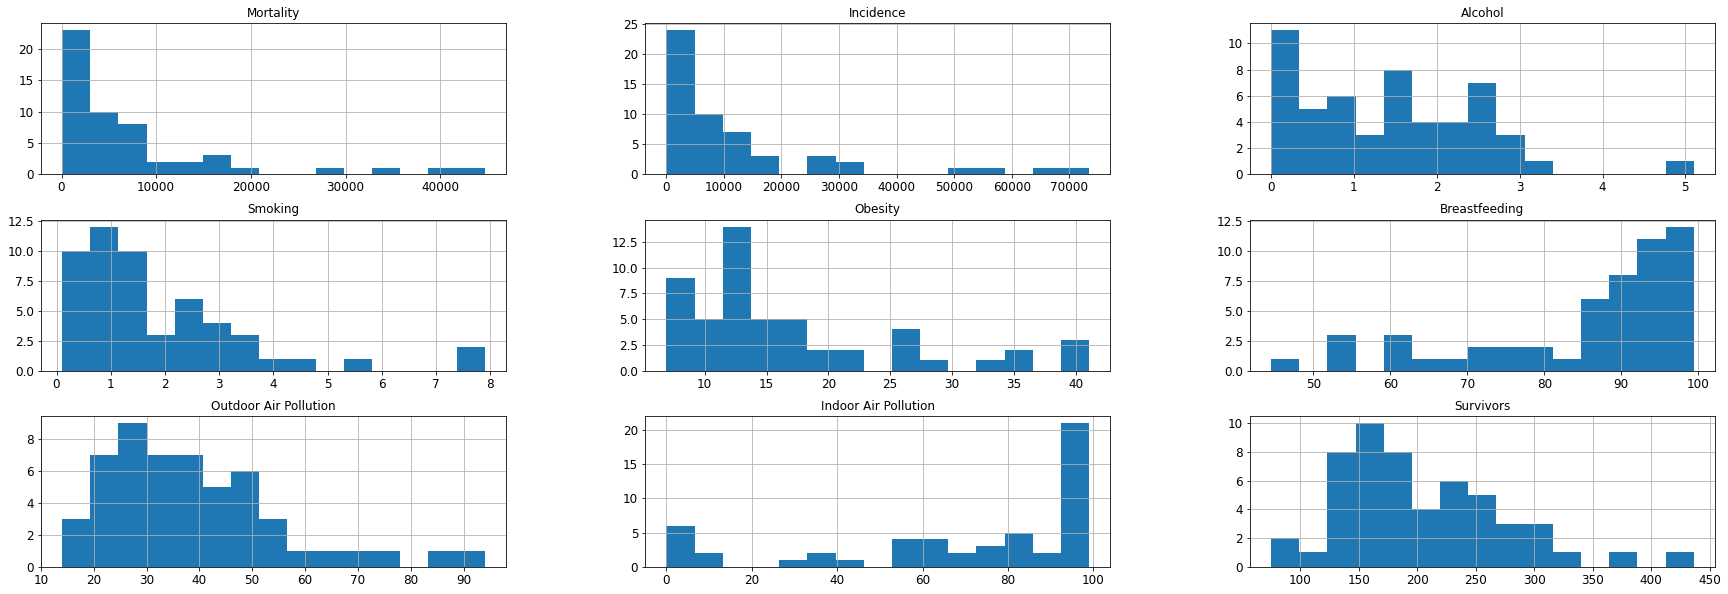

In [73]:
df_final.hist(bins = 15, figsize = (30, 10))
plt.savefig('Histogram Plot', dpi=200, bbox_inches='tight')
plt.show()

We now wish to save our data in a new excel file

In [74]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [75]:
from openpyxl import Workbook, load_workbook
from openpyxl.drawing.image import Image
from openpyxl.utils.dataframe import dataframe_to_rows

In [76]:
book = Workbook()
sheet = book.active
book.save(r"C:\Users\chibuikn\OneDrive - NTNU\RESEARCH\African Women Cancer\African Women Cancer Full.xlsx")

In [77]:
sheet2 = book.create_sheet('sheet2', 0)
sheet = book['sheet2']
for x in dataframe_to_rows(df_final):
    sheet.append(x)
book.save(r"C:\Users\chibuikn\OneDrive - NTNU\RESEARCH\African Women Cancer\African Women Cancer Full.xlsx")

In [78]:
df = pd.read_excel(r"C:\Users\chibuikn\OneDrive - NTNU\RESEARCH\African Women Cancer\\African Women Cancer Full.xlsx")
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop(0, axis = 0)

In [79]:
df.head()

,Country,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors
1,Algeria,14900.0,31090.0,0.2,2.2,34.9,55.1,39.0,0.32,312.6
2,Angola,6914.0,11553.0,2.4,1.6,12.1,92.6,32.0,56.00,190.2
3,Benin,2397.0,3617.0,1.1,1.0,14.2,85.6,39.0,90.00,198.1
4,Botswana,618.0,1171.0,2.1,3.5,29.3,44.5,23.0,46.00,236.7
5,Burkina Faso,5447.0,7740.0,2.4,3.5,8.1,97.2,43.0,95.00,158.1


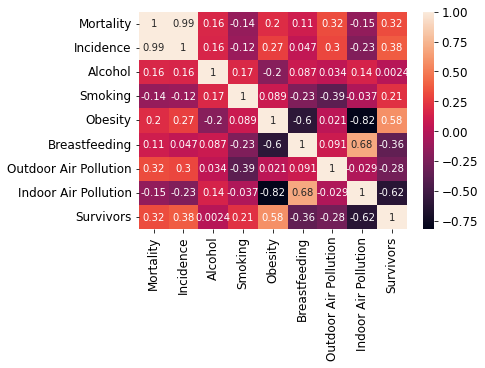

In [80]:
cancer_corr = df.corr()
sns.heatmap(cancer_corr, annot = True)

plt.savefig('Correlation Analysis', dpi=200, bbox_inches='tight')
plt.show()

In [81]:
eda = df.describe(include = [np.number])

eda_table = pd.ExcelWriter('EDA table.xlsx', engine = 'xlsxwriter')
eda.to_excel(eda_table)
eda_table.save()

C:\Users\chibuikn\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mortality', ylabel='Density'>

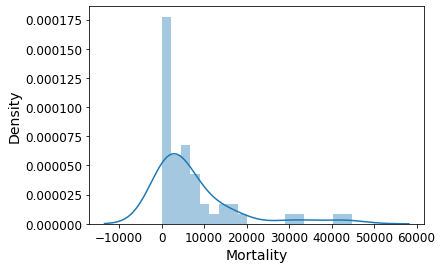

In [82]:
sns.distplot(df['Mortality'], bins = 20)

C:\Users\chibuikn\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Incidence', ylabel='Density'>

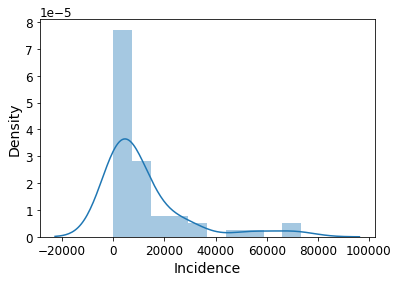

In [83]:
sns.distplot(df['Incidence'], bins = 10)

In [86]:
df['MIR'] = df['Mortality'] / df['Incidence']

In [87]:
df.head(40)

,Country,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors,MIR
1,Algeria,14900.0,31090.0,0.2,2.2,34.9,55.10,39.0,0.320,312.6,0.479254
2,Angola,6914.0,11553.0,2.4,1.6,12.1,92.60,32.0,56.000,190.2,0.598459
3,Benin,2397.0,3617.0,1.1,1.0,14.2,85.60,39.0,90.000,198.1,0.662704
4,Botswana,618.0,1171.0,2.1,3.5,29.3,44.50,23.0,46.000,236.7,0.527754
5,Burkina Faso,5447.0,7740.0,2.4,3.5,8.1,97.20,43.0,95.000,158.1,0.703747
6,Burundi,3288.0,4641.0,1.9,0.9,8.6,96.40,39.0,99.000,194.8,0.708468
7,Cabo Verde,226.0,420.0,2.5,2.6,16.3,83.10,35.0,39.000,254.2,0.538095
8,Cameroon,7551.0,12235.0,2.3,0.5,16.4,85.50,73.0,65.000,180.5,0.617164
9,Central African Republic,1158.0,1612.0,1.4,1.4,10.9,90.90,57.0,98.000,110.8,0.718362
10,Chad,3545.0,5142.0,1.6,1.9,8.9,90.40,66.0,96.000,128.9,0.689420


In [88]:
mir_table = pd.ExcelWriter('MIR table.xlsx', engine = 'xlsxwriter')
df.to_excel(mir_table)
mir_table.save()

In [89]:
df.sort_values(by = 'MIR', ascending = False)

,Country,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors,MIR
23,Guinea,3698.0,5069.0,1.0,1.4,11.50,94.90,26.0,98.000,131.0,0.729532
21,Gambia,415.0,575.0,2.0,0.8,14.80,98.70,34.0,95.000,74.8,0.721739
46,South Sudan,2617.0,3626.0,1.5,1.7,22.75,87.40,46.0,99.000,168.8,0.721732
24,Guinea-Bissau,518.0,720.0,1.7,1.0,13.70,97.80,30.0,97.000,135.5,0.719444
44,Somalia,4612.0,6411.0,0.1,1.6,12.30,61.00,32.0,99.000,148.8,0.719389
9,Central African Republic,1158.0,1612.0,1.4,1.4,10.90,90.90,57.0,98.000,110.8,0.718362
35,Mozambique,10966.0,15406.0,0.4,3.6,10.50,93.00,21.0,95.000,192.2,0.711801
37,Niger,4043.0,5680.0,0.3,0.1,8.70,95.80,94.0,98.000,89.1,0.711796
27,Liberia,1507.0,2121.0,2.4,1.7,14.20,95.20,18.0,97.000,142.9,0.710514
6,Burundi,3288.0,4641.0,1.9,0.9,8.60,96.40,39.0,99.000,194.8,0.708468


In [159]:
cancer_corrb = df.corr()
cancer_corrb

,Mortality,Incidence,Alcohol,Smoking,Obesity,Breastfeeding,Outdoor Air Pollution,Indoor Air Pollution,Survivors,MIR
Mortality,1.000000,0.992889,0.164235,-0.144653,0.195963,0.106431,0.317209,-0.152937,0.317253,-0.178773
Incidence,0.992889,1.000000,0.159854,-0.117388,0.273580,0.046638,0.302548,-0.228169,0.375069,-0.250234
Alcohol,0.164235,0.159854,1.000000,0.167865,-0.201816,0.086718,0.034182,0.144319,0.002441,-0.047690
Smoking,-0.144653,-0.117388,0.167865,1.000000,0.089464,-0.231405,-0.385535,-0.036635,0.214844,-0.121260
Obesity,0.195963,0.273580,-0.201816,0.089464,1.000000,-0.603839,0.020654,-0.820905,0.582261,-0.643358
Breastfeeding,0.106431,0.046638,0.086718,-0.231405,-0.603839,1.000000,0.091290,0.682641,-0.360829,0.649880
Outdoor Air Pollution,0.317209,0.302548,0.034182,-0.385535,0.020654,0.091290,1.000000,-0.029270,-0.281275,0.083074
Indoor Air Pollution,-0.152937,-0.228169,0.144319,-0.036635,-0.820905,0.682641,-0.029270,1.000000,-0.622231,0.854061
Survivors,0.317253,0.375069,0.002441,0.214844,0.582261,-0.360829,-0.281275,-0.622231,1.000000,-0.710801
MIR,-0.178773,-0.250234,-0.047690,-0.121260,-0.643358,0.649880,0.083074,0.854061,-0.710801,1.000000


In [170]:
#cancer_corrdf = pd.DataFrame(cancer_corr)
cancer_corr2 = cancer_corrb.drop(columns = 'Alcohol', axis = 1)
cancer_corr3 = cancer_corr2.drop('Smoking', axis = 1)
cancer_corr4 = cancer_corr3.drop('Obesity', axis = 1)
cancer_corr5 = cancer_corr4.drop('Breastfeeding', axis = 1)
cancer_corr6 = cancer_corr5.drop('Outdoor Air Pollution', axis = 1)
cancer_corr7 = cancer_corr6.drop('Indoor Air Pollution', axis = 1)
cancer_corr7a = cancer_corr7.drop('Survivors', axis = 1)
cancer_corr8 = cancer_corr7a.drop('Mortality', axis = 0)
cancer_corr9 = cancer_corr8.drop('Incidence', axis = 0)
cancer_corr10 = cancer_corr9.drop('Survivors', axis = 0)
cancer_corr11 = cancer_corr10.drop('MIR', axis = 0)
survival_name = {'Survivors':'Survival'}
cancer_corr12 = cancer_corr11.rename(columns = survival_name)
cancer_corr12

,Mortality,Incidence,MIR
Alcohol,0.164235,0.159854,-0.047690
Smoking,-0.144653,-0.117388,-0.121260
Obesity,0.195963,0.273580,-0.643358
Breastfeeding,0.106431,0.046638,0.649880
Outdoor Air Pollution,0.317209,0.302548,0.083074
Indoor Air Pollution,-0.152937,-0.228169,0.854061


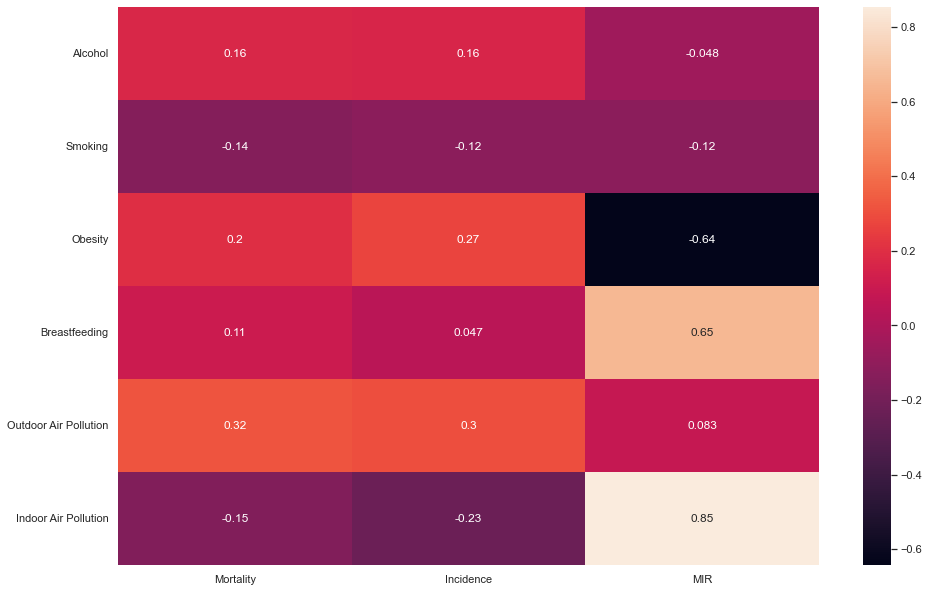

In [171]:
sns.heatmap(cancer_corr12, annot = True)

plt.savefig('New Correlation Analysis', dpi=200, bbox_inches='tight')
plt.show()

In [141]:
mir = pd.concat([df['Country'], df['Mortality'], df['Incidence'], df['MIR']], axis=1)
mir = mir.set_index('Country')
mir_table = pd.ExcelWriter('MIR table.xlsx', engine = 'xlsxwriter')
mir.to_excel(mir_table)
mir_table.save()